# Load dataset

In [1]:
from itertools import chain
import glob

classes = [
 'n02111889-Samoyed',
 'n02098286-West_Highland_white_terrier',
 'n02085782-Japanese_spaniel',
 'n02088466-bloodhound'
]

dog_images = list(chain.from_iterable([glob.glob(f'./Images/{cls}/*') for cls in classes]))
annotations = list(chain.from_iterable([glob.glob(f'./Annotation/{cls}/*') for cls in classes]))

print('lenghth of dog images: ', len(dog_images))
print('lenghth of annotations: ', len(annotations))

lenghth of dog images:  759
lenghth of annotations:  759


# Crop dataset

In [2]:
import os
import xml.etree.ElementTree as ET
from pathlib import Path
from PIL import Image

def get_bounding_boxes(annot):
    xml = annot
    tree = ET.parse(xml)
    root = tree.getroot()
    objects = root.findall('object')
    bbox = []
    for o in objects:
        bndbox = o.find('bndbox')
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)
        bbox.append((xmin,ymin,xmax,ymax))
    return bbox

def get_image(annot):
    img_path = './Images/'
    file = annot.split('/')
    img_filename = img_path + file[-2]+'/'+file[-1]+'.jpg'
    return img_filename


for i in range(len(dog_images)):
    bbox = get_bounding_boxes(annotations[i])
    dog = get_image(annotations[i])
    im = Image.open(dog)
    for j in range(len(bbox)):
        im2 = im.crop(bbox[j])
        im2 = im2.resize((331,331),Image.Resampling.LANCZOS)
        new_path = dog.replace('./Images/','./Cropped/')
        new_path = new_path.replace('.jpg','-' + str(j) + '.jpg')
        im2=im2.convert('RGB')
        head, tail = os.path.split(new_path)
        Path(head).mkdir(parents=True, exist_ok=True)
        im2.save(new_path)

# Plot greyscale images with histograms

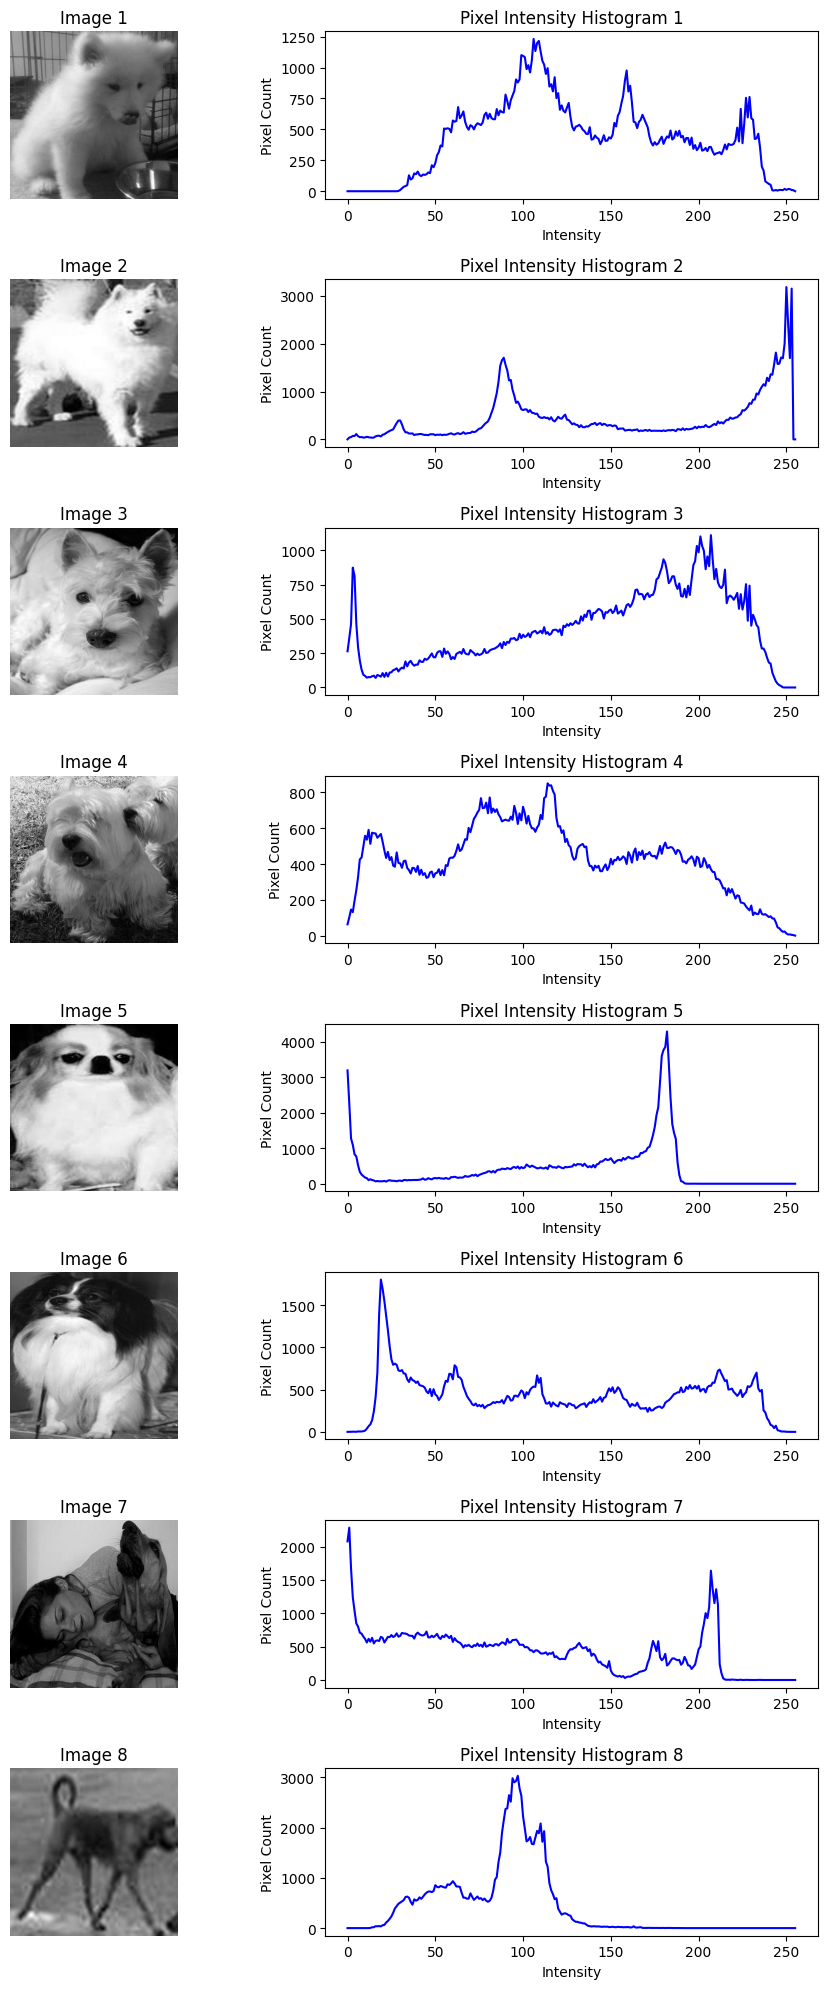

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def image_to_greyscale(image):
    h, w, _ = image.shape
    greyscale = np.zeros((h,w), dtype=np.uint8)
    for x in range(w):
        for y in range(h):
            r, g, b = image[y, x]
            greyscale[y, x] = 0.299 * r + 0.587 * g + 0.114 * b
    return greyscale

def plot_histograms(images, channels, figsize=(10,20)):
    colors = ['blue', 'green', 'red']
    plt.figure(figsize=figsize)
    for ndx, image in enumerate(images):
        plt.subplot(len(greyscales), 2, 2 * ndx + 1)
        plt.title(f'Image {ndx + 1}')
        plt.axis('off')
        plt.imshow(image, cmap='gray')

        plt.subplot(len(greyscales), 2, 2 * ndx + 2)
        for channel in channels:
            histogram = cv2.calcHist([image], [channel], None, [256], [0,255])
            plt.plot(histogram, color=colors[channel])
        plt.title(f'Pixel Intensity Histogram {ndx + 1}')
        plt.xlabel('Intensity')
        plt.ylabel('Pixel Count')
    plt.tight_layout()
        
# choose two images from each class
images = []
for cls in classes:
    images.extend(glob.glob(f'./Cropped/{cls}/*')[:2])

# convert the images to greyscacle using iteration
greyscales = []
for image_path in images:
    image = cv2.imread(image_path)
    greyscales.append(image_to_greyscale(image))


# Plot images and histograms side by side
plot_histograms(greyscales, [0])
plt.show()
    

# Show intensity equalized images along with histograms

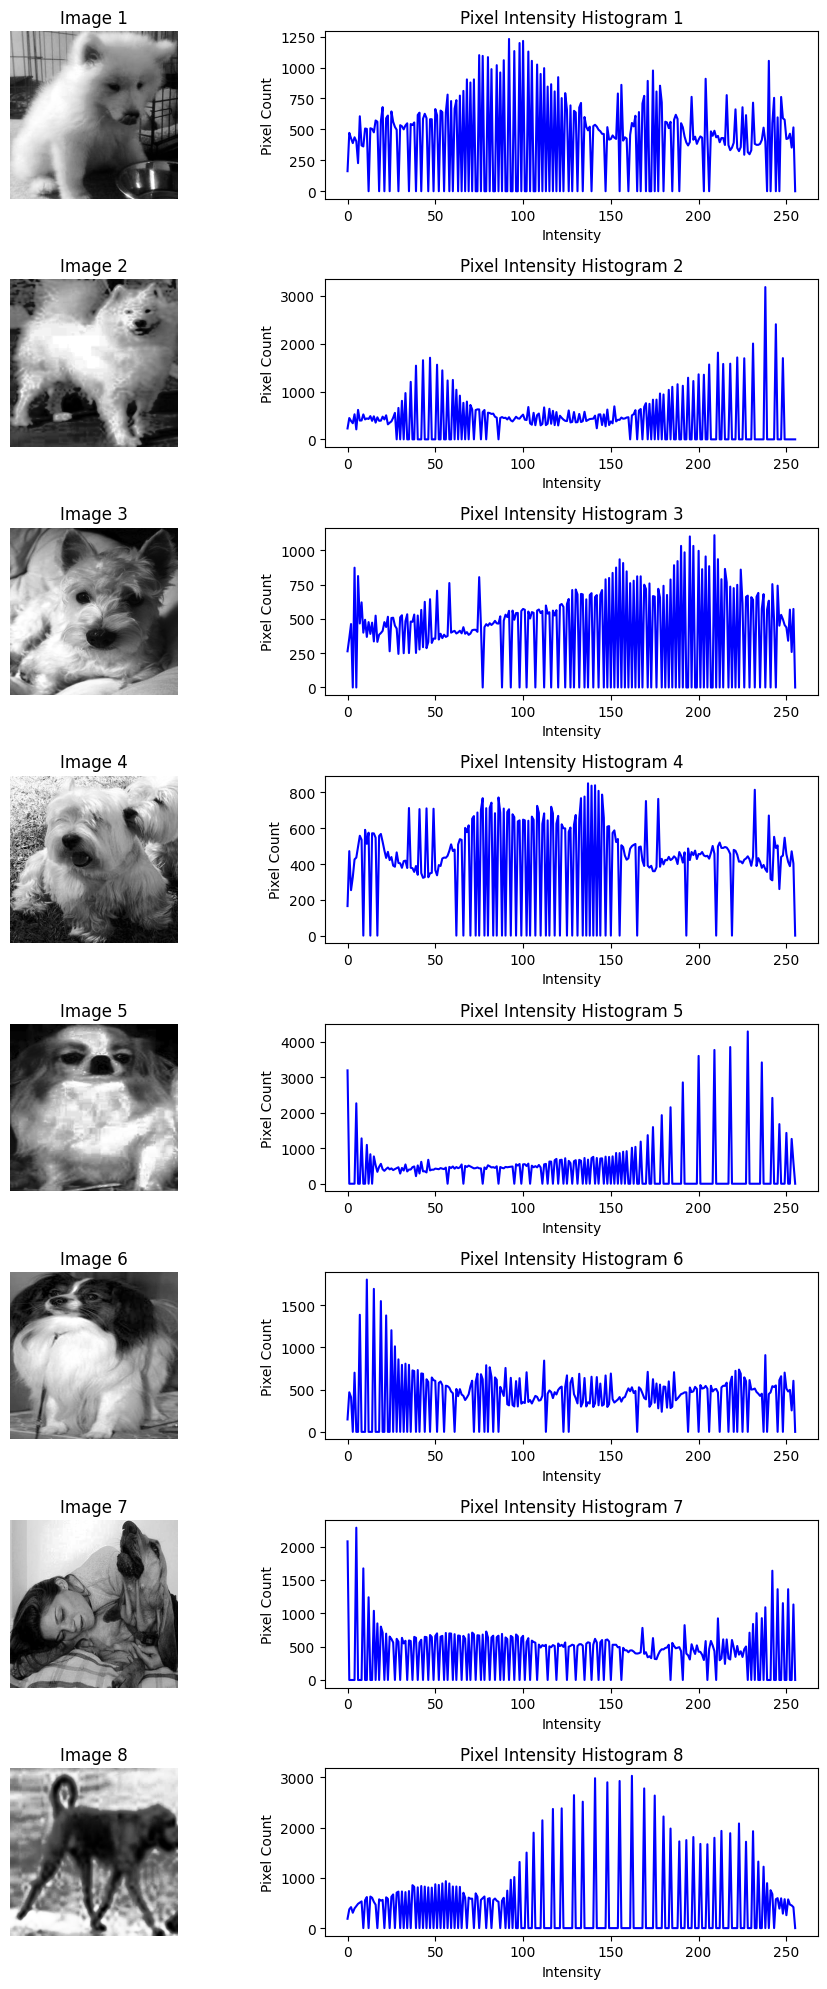

In [4]:

import numpy as np
import matplotlib.pyplot as plt
import cv2

# choose two images from each class
images = []
for cls in classes:
    images.extend(glob.glob(f'./Cropped/{cls}/*')[:2])

# convert the images to greyscacle using iteration
greyscales = []
for image_path in images:
    image = cv2.imread(image_path)
    greyscales.append(image_to_greyscale(image))

# perform histogram equalization
equ = []
for image in greyscales:
    equ.append(cv2.equalizeHist(image))

plot_histograms(equ, [0])
plt.show()

# Compare original and equalized greyscale images

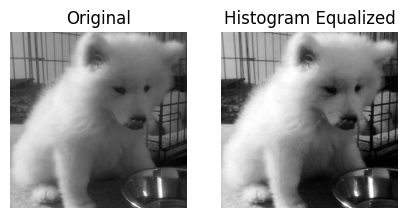

The equalized image has more contrast, with darker darks and whiter whites.


In [30]:
plt.figure(figsize=(5,5))

plt.subplot(1,2,1)
plt.title('Original')
plt.axis('off')
plt.imshow(greyscales[0], cmap='gray')

plt.subplot(1,2,2)
plt.title('Histogram Equalized')
plt.axis('off')
plt.imshow(equ[0], cmap='gray')

plt.show()

print("The equalized image has more contrast, with darker darks and whiter whites.")

# Show intensity histogram for each channel

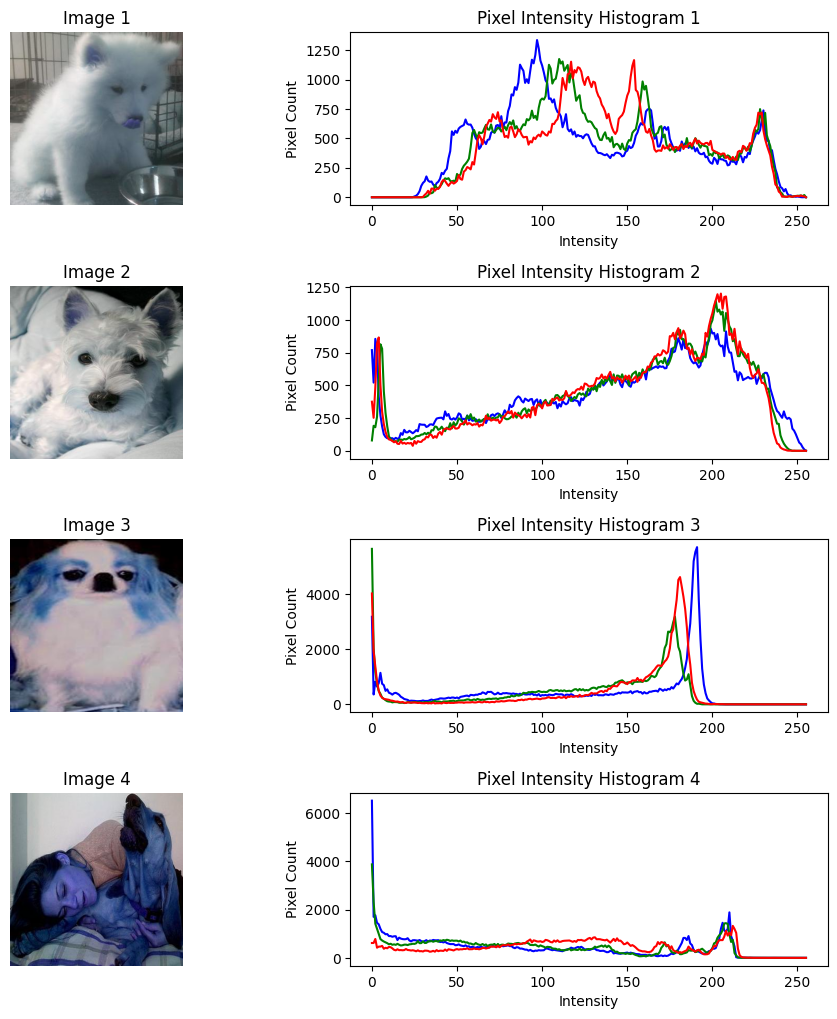

In [6]:
# choose 1 image from each class
images = []

for cls in classes:
    images.append(cv2.imread(glob.glob(f'./Cropped/{cls}/*')[0]))

# Plot images and histograms side by side
plot_histograms(images, [0,1,2])

plt.show()
    



# Histogram Comparison

In [7]:
import numpy as np

def euclideanDistance(a, b):
    return np.linalg.norm(a - b)

def manhattanDistance(a, b):
    return np.sum(np.abs(a - b))

def bhattacharyyaDistance(a, b):
    return cv2.compareHist(a, b, cv2.HISTCMP_BHATTACHARYYA)

def histogramIntersection(a, b):
    return cv2.compareHist(a, b, cv2.HISTCMP_INTERSECT)


image1 = image_to_greyscale(cv2.imread('./Cropped/n02085782-Japanese_spaniel/n02085782_1039-0.jpg'))
image2 = image_to_greyscale(cv2.imread('./Cropped/n02085782-Japanese_spaniel/n02085782_1058-0.jpg'))
image3 = image_to_greyscale(cv2.imread('./Cropped/n02088466-bloodhound/n02088466_10083-0.jpg'))

hist1 = cv2.calcHist([image1], [0], None, [256], [0, 256])
hist2 = cv2.calcHist([image2], [0], None, [256], [0, 256])
hist3 = cv2.calcHist([image3], [0], None, [256], [0, 256])

print('Euclidean distance between image1 and image2 (same class): ', euclideanDistance(hist1, hist2))
print('Euclidean distance between image1 and image3 (different class): ', euclideanDistance(hist1, hist3))
print('Euclidean distance between image2 and image3 (different class): ', euclideanDistance(hist2, hist3))
print()
print('Manhattan distance between image1 and image2 (same class): ', manhattanDistance(hist1, hist2))
print('Manhattan distance between image1 and image3 (different class): ', manhattanDistance(hist1, hist3))
print('Manhattan distance between image2 and image3 (different class): ', manhattanDistance(hist2, hist3))
print()
print('Bhattacharyya distance between image1 and image2 (same class): ', bhattacharyyaDistance(hist1, hist2))
print('Bhattacharyya distance between image1 and image3 (different class): ', bhattacharyyaDistance(hist1, hist3))
print('Bhattacharyya distance between image2 and image3 (different class): ', bhattacharyyaDistance(hist2, hist3))
print()
print('Histogram intersection between image1 and image2 (same class): ', histogramIntersection(hist1, hist2))
print('Histogram intersection between image1 and image3 (different class): ', histogramIntersection(hist1, hist3))
print('Histogram intersection between image2 and image3 (different class): ', histogramIntersection(hist2, hist3))





Euclidean distance between image1 and image2 (same class):  12508.184
Euclidean distance between image1 and image3 (different class):  9860.719
Euclidean distance between image2 and image3 (different class):  13241.424

Manhattan distance between image1 and image2 (same class):  108256.0
Manhattan distance between image1 and image3 (different class):  107640.0
Manhattan distance between image2 and image3 (different class):  134898.0

Bhattacharyya distance between image1 and image2 (same class):  0.44190303634361044
Bhattacharyya distance between image1 and image3 (different class):  0.4814497677769504
Bhattacharyya distance between image2 and image3 (different class):  0.6167431608054486

Histogram intersection between image1 and image2 (same class):  55433.0
Histogram intersection between image1 and image3 (different class):  55741.0
Histogram intersection between image2 and image3 (different class):  42112.0


# ORB Feature Extractor

Extracted 75 keypoints.


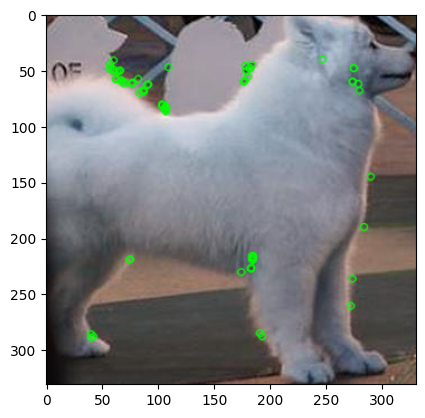

In [8]:
# pick 1 image
image = cv2.imread(glob.glob(f'./Cropped/{classes[0]}/*')[42])
orb = cv2.ORB_create(edgeThreshold = 40)
kp = orb.detect(image, None)
print(f"Extracted {len(kp)} keypoints.")

img2 = cv2.drawKeypoints(image, kp, None, color=(0,255,0), flags=0)
plt.imshow(img2)
plt.show()

# Dimensionality Reduction

100%|██████████| 186/186 [00:00<00:00, 1709.43it/s]


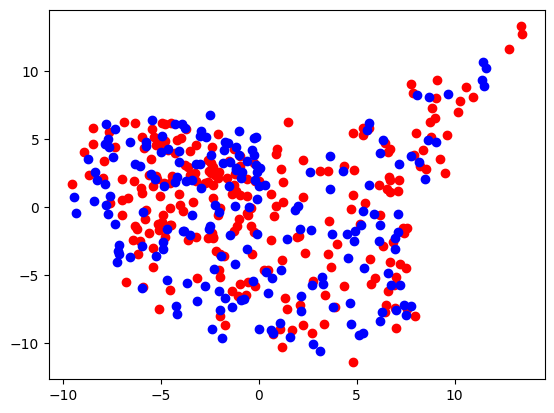

The two classes are not separable


In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# choose images from two different classes
images = [cv2.imread(path) for path in glob.glob(f'./Cropped/{classes[0]}/*')]
second_class_start_index = len(images)
images.extend([cv2.imread(path) for path in glob.glob(f'./Cropped/{classes[1]}/*')])

# Convert to greyscale
# Using iteration here proved to be too slow
images = [cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in images]

# Convert to histogram
images = list(map(lambda x : cv2.calcHist(x, [0], None, [256], [0,255]).ravel(), images))

# Perform scaling and PCA
scaler = StandardScaler()
pca = PCA(n_components=2)

scaled = scaler.fit_transform(images)
principle_components = pca.fit_transform(scaled)

plt.scatter(principle_components[:second_class_start_index,0],principle_components[:second_class_start_index,1], color='red')
plt.scatter(principle_components[second_class_start_index:,0],principle_components[second_class_start_index:,1], color='blue')
plt.show()

print("The two classes are not separable")





